In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load Data

In [3]:
# Load training data
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# show number of rows and columns  (m, n)
train_data.shape

(1460, 81)

In [5]:
# Load testing data
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
# show number of rows and columns  (m, n)
test_data.shape

(1459, 80)

# Data Exploration

In [7]:
# Show the column labels of the data
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
# Summary statistics for numerical features
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# Summary statistics for categorical features
train_data.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


# Let's know more about 'SalePrice' (Target Variable)

In [10]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

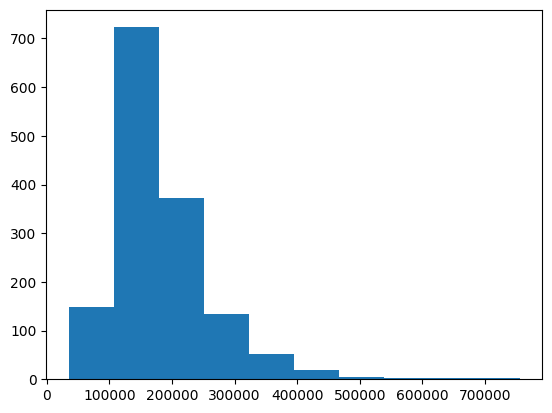

In [11]:
# A histogram to represent the distribution of data (SalePrice)
plt.hist(train_data['SalePrice'])

In [12]:
# Skewness value
train_data['SalePrice'].skew()

1.8828757597682129

In [13]:
# Kurtosis value
train_data['SalePrice'].kurt()

6.536281860064529

**Relationship between 'SalePrice' and other features**

<Axes: >

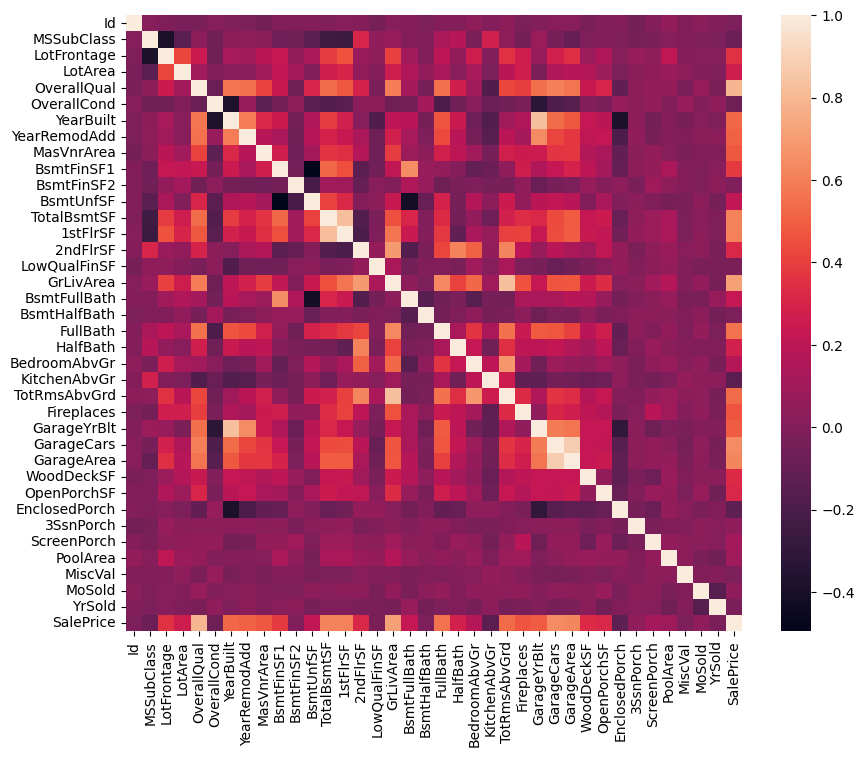

In [14]:
# Correlation matrix to get quick overview on relationships
corrmat = train_data.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, square=True)

<Axes: >

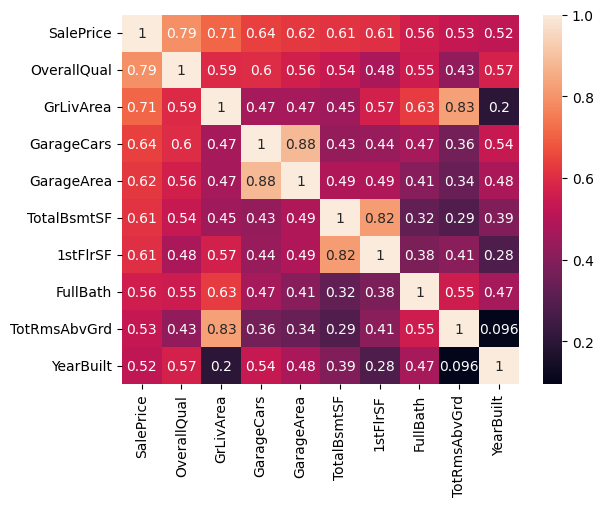

In [15]:
# SalePrice correlation matrix
k = 10   # number of columns
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index   # nlargest pick most powerful correlation
CM = np.corrcoef(train_data[cols].values.T)
sns.heatmap(CM, annot=True, xticklabels=cols.values, yticklabels=cols.values)

These are the most 9 features have correlation with 'SalePrice'. wether positive or negative correlation

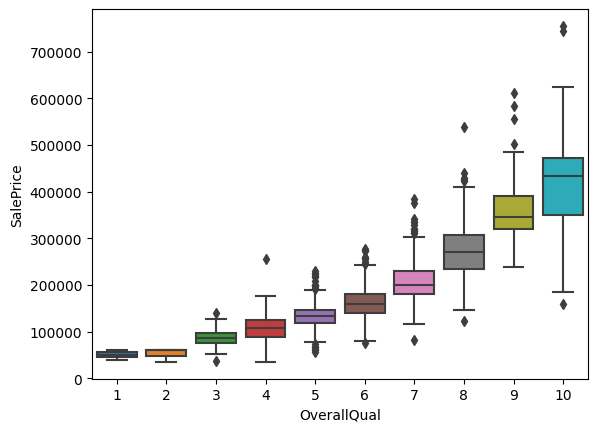

In [16]:
# Correlation between 'SalePrice' and 'OverallQual'
var = 'OverallQual'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
fig = sns.boxplot(data=data, x=var, y='SalePrice')

we note that there is a strong positive correlation between 'SalePrice' and 'OverallQual'

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

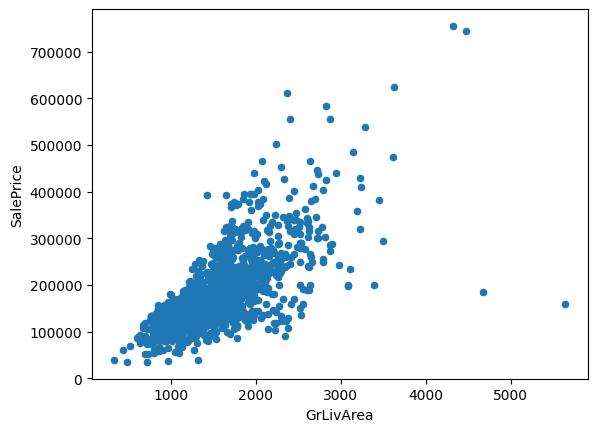

In [17]:
# Correlation between 'SalePrice' and 'GrLivArea'
var = 'GrLivArea'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

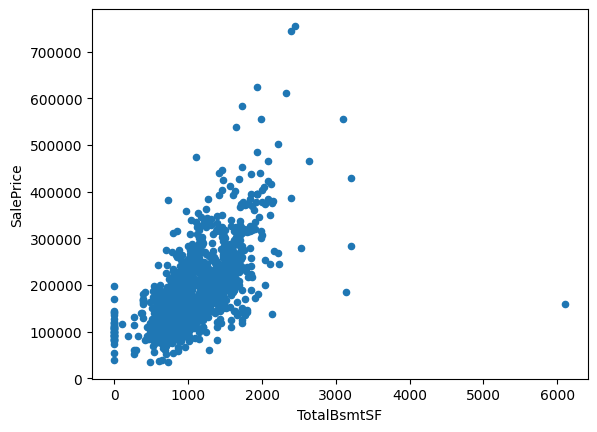

In [18]:
# Correlation between 'SalePrice' and 'TotalBsmtSF'
var = 'TotalBsmtSF'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

(-0.5, 111.5, 0.0, 800000.0)

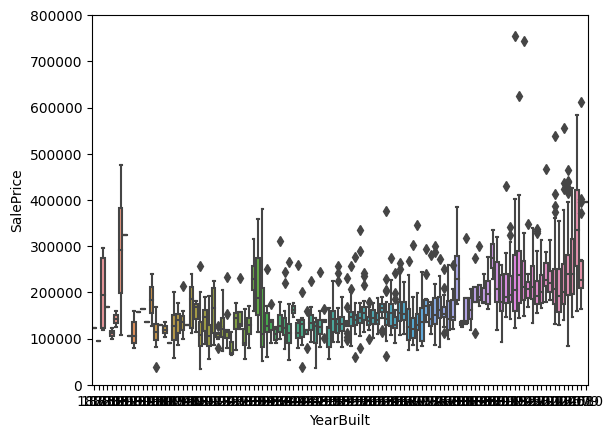

In [19]:
# Correlation between 'SalePrice' and 'YearBuilt'
var = 'YearBuilt'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
fig = sns.boxplot(data=data, x=var, y='SalePrice')
fig.axis(ymin=0, ymax=800000)

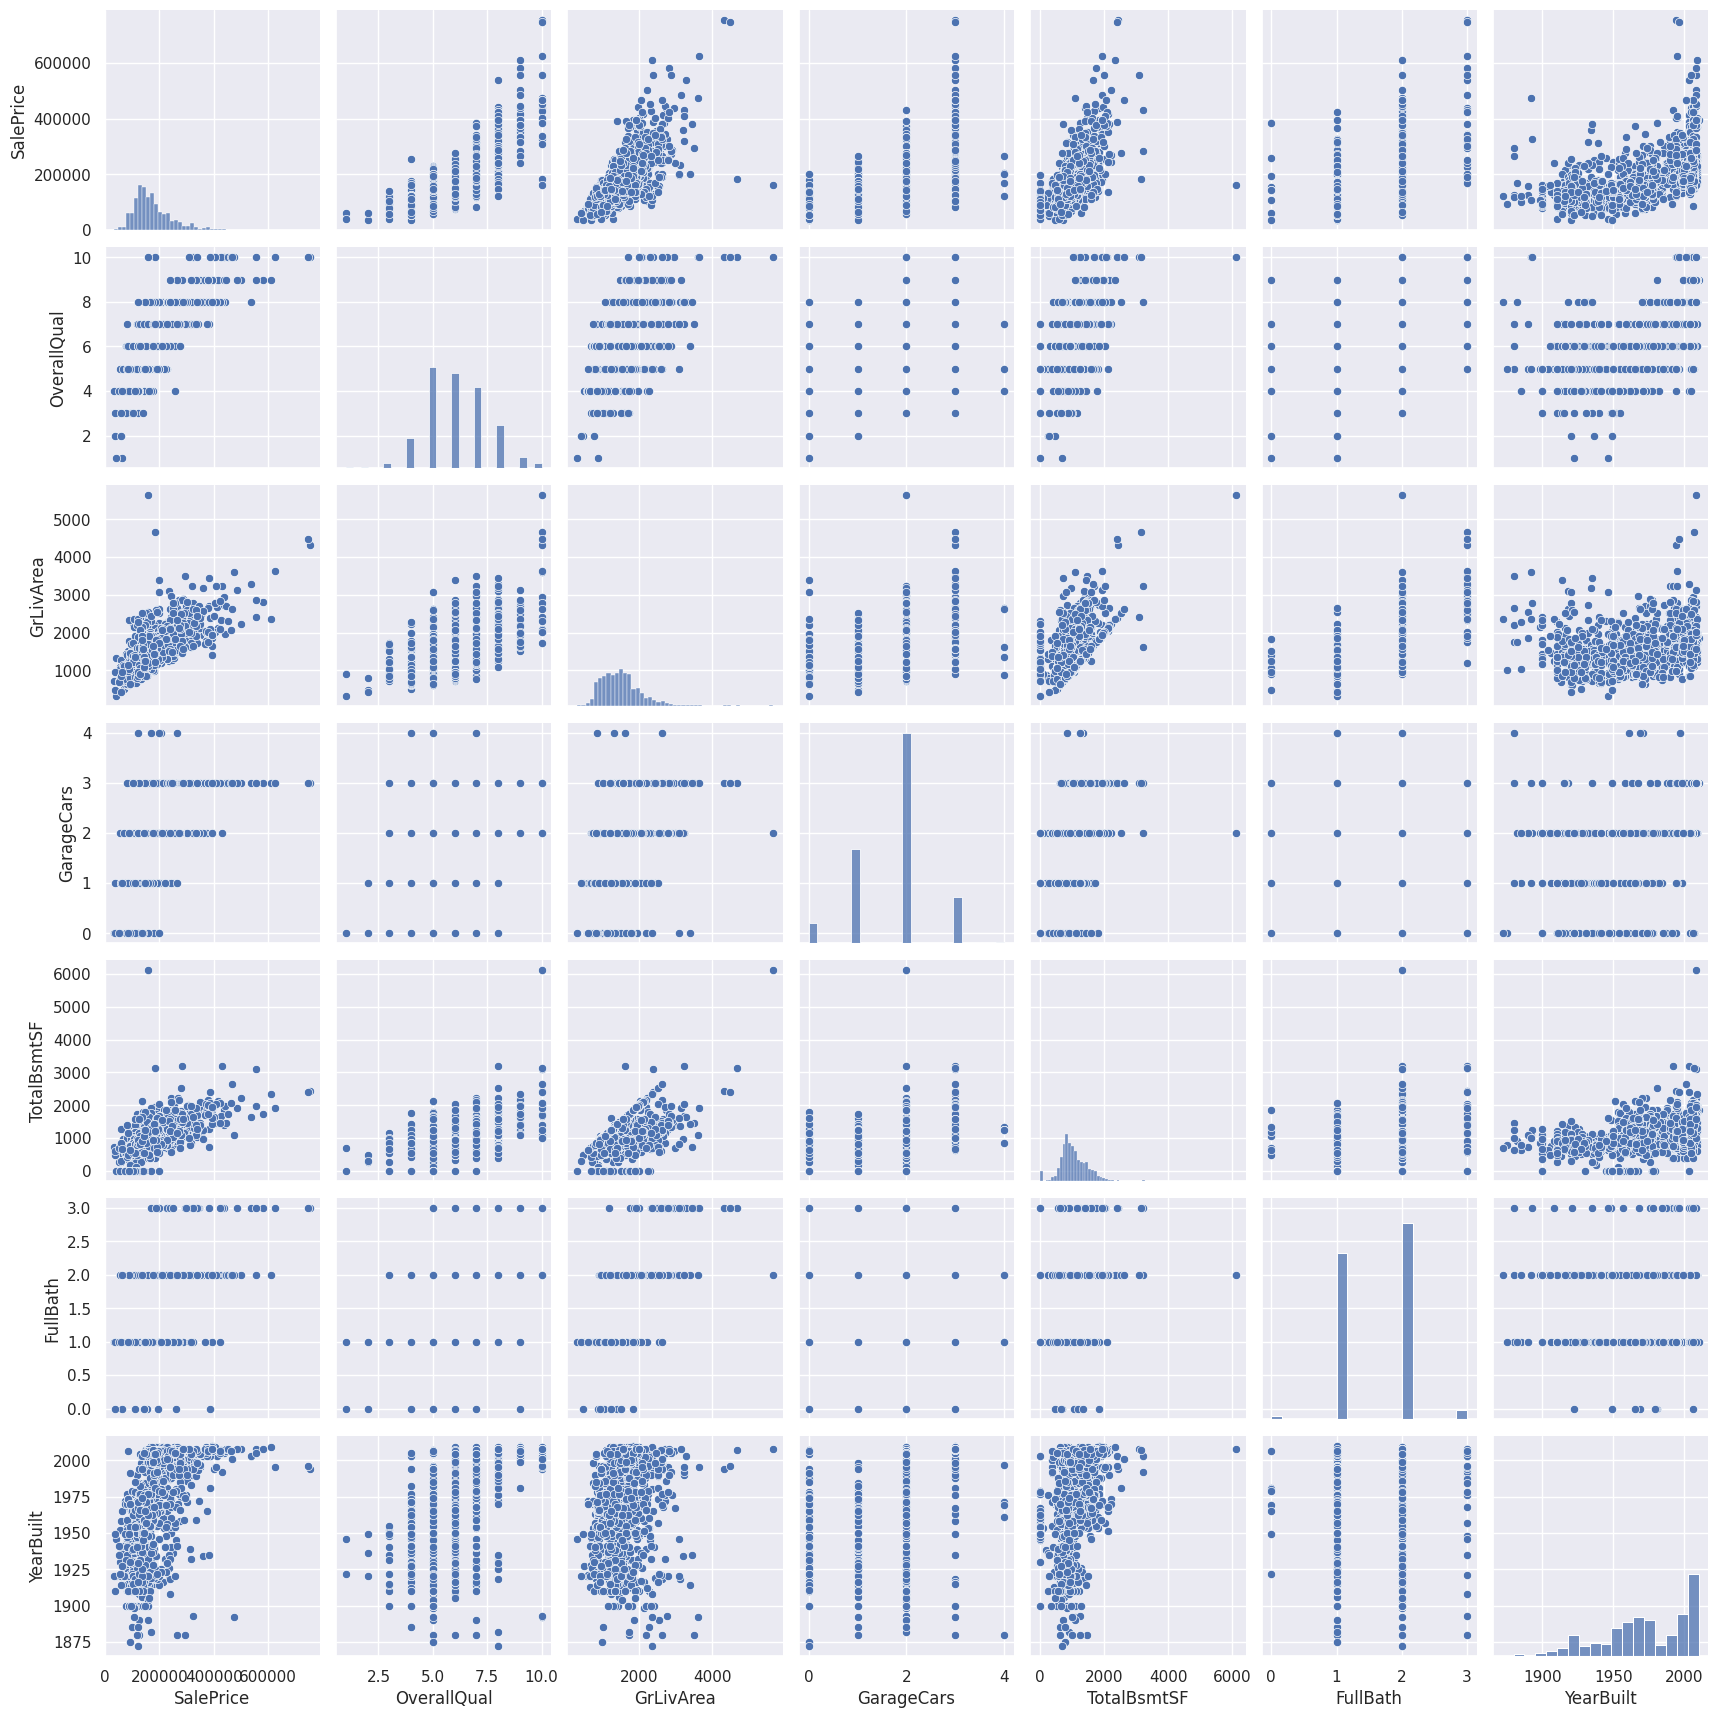

In [20]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols])

In [21]:
# Showing the types of feature columns.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Cleaning

**1. Training Data**

In [22]:
# Missing data
total = train_data.isnull().sum().sort_values(ascending=False)
ratio = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False, )
missing_data = pd.concat([total, ratio], axis=1, keys=['Total', 'Ratio'])
missing_data.head(20)  # print first 20 row

,Total,Ratio
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [23]:
# The features which contain null values
drop_feat = list(missing_data[:19].index)
drop_feat

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'MasVnrType',
 'FireplaceQu',
 'LotFrontage',
 'GarageYrBlt',
 'GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'MasVnrArea',
 'Electrical']

In [24]:
# Now drop the features
train_data = train_data.drop(drop_feat, axis=1)
test_data = test_data.drop(drop_feat, axis=1)

In [25]:
train_data.isnull().sum().max()  # Check that there's no missing data in train_data

0

In [26]:
train_data.head()    # print the first 5 rows

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


**Detect and remove the outliers**

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

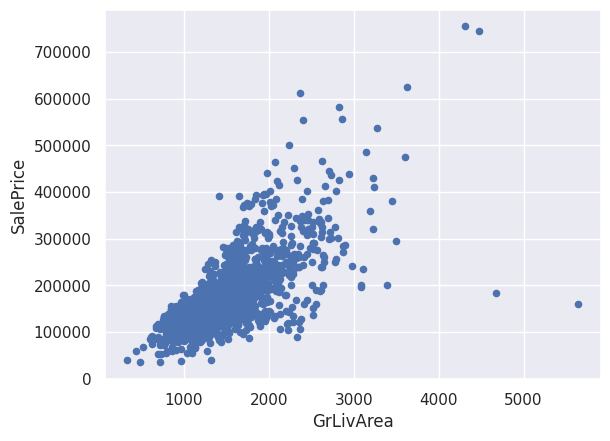

In [27]:
var = 'GrLivArea'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

Here we note that there are two points (in the right bottom) have large value in 'GrLivArea' and small value in 'SalePrice'

Delete the two points

In [28]:
train_data.sort_values(by='GrLivArea', ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [29]:
train_data = train_data.drop(train_data[train_data['Id'] == 1299].index)
train_data = train_data.drop(train_data[train_data['Id'] == 524].index)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

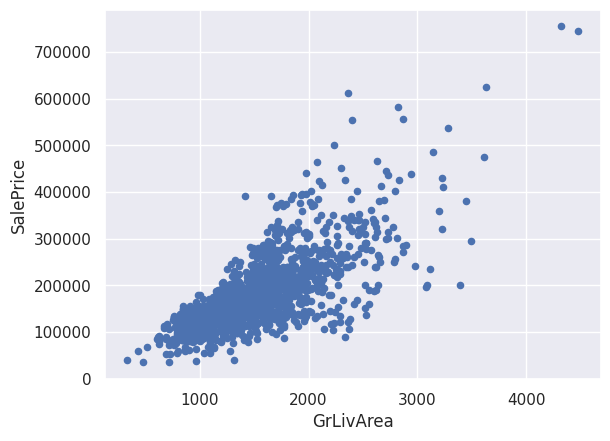

In [30]:
var = 'GrLivArea'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

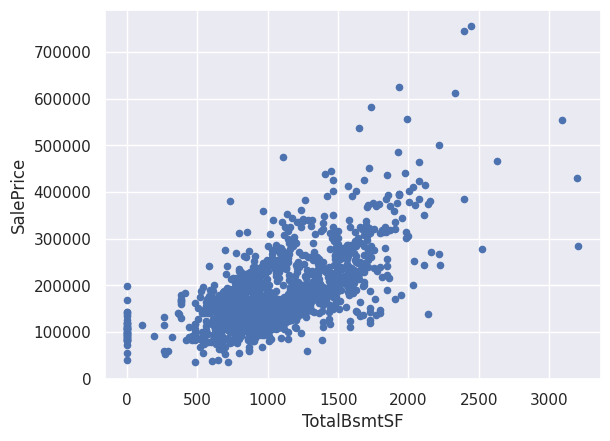

In [31]:
var = 'TotalBsmtSF'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

**2. Testing Data**

In [32]:
# Missing data
total = test_data.isnull().sum().sort_values(ascending=False)
ratio = (test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, ratio], axis=1, keys=['Total', 'Ratio'])
missing_data.head(20)  # print first 20 row

,Total,Ratio
MSZoning,4,0.002742
Functional,2,0.001371
BsmtFullBath,2,0.001371
BsmtHalfBath,2,0.001371
Utilities,2,0.001371
BsmtFinSF2,1,0.000685
BsmtFinSF1,1,0.000685
Exterior2nd,1,0.000685
GarageCars,1,0.000685
GarageArea,1,0.000685


In [33]:
test_data["BsmtFinSF1"]

0        468.0
1        923.0
2        791.0
3        602.0
4        263.0
         ...  
1454       0.0
1455     252.0
1456    1224.0
1457     337.0
1458     758.0
Name: BsmtFinSF1, Length: 1459, dtype: float64

In [34]:
# filling null values in numerical features

for col in ('GarageCars', 'GarageArea'):
    test_data[col] = test_data[col].fillna(0)

test_data["BsmtFinSF1"] = test_data["BsmtFinSF1"].fillna(test_data["BsmtFinSF1"].median())
test_data["BsmtFinSF2"] = test_data["BsmtFinSF2"].fillna(test_data["BsmtFinSF1"].median())

test_data["BsmtFullBath"] = test_data["BsmtFullBath"].fillna(0.0)
test_data["BsmtHalfBath"] = test_data["BsmtHalfBath"].fillna(0.0)
test_data["TotalBsmtSF"]  = test_data["BsmtFinSF1"] + test_data["BsmtFinSF2"]
test_data["BsmtUnfSF"] = test_data["BsmtUnfSF"].fillna(test_data["BsmtUnfSF"].median())

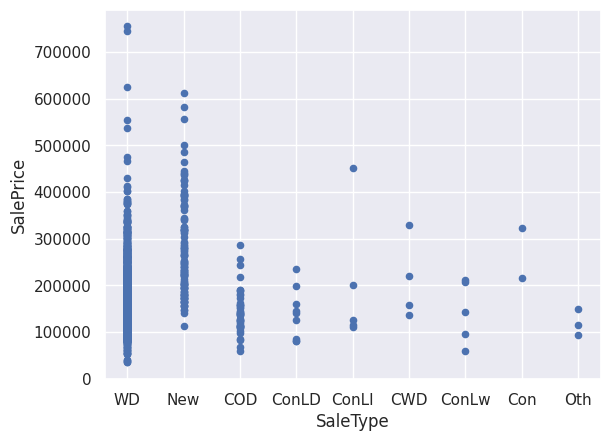

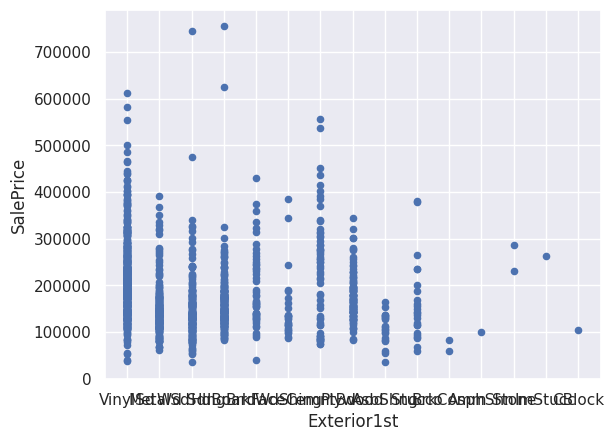

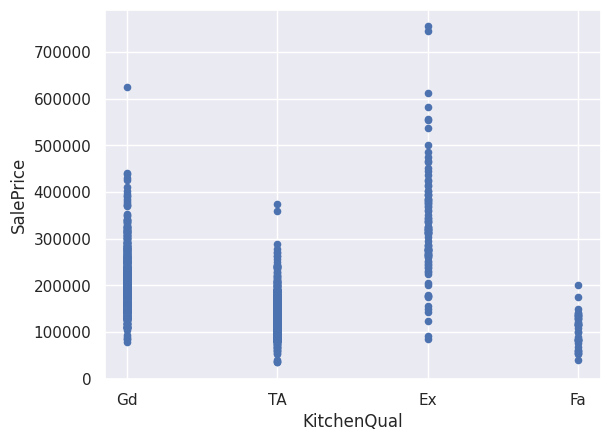

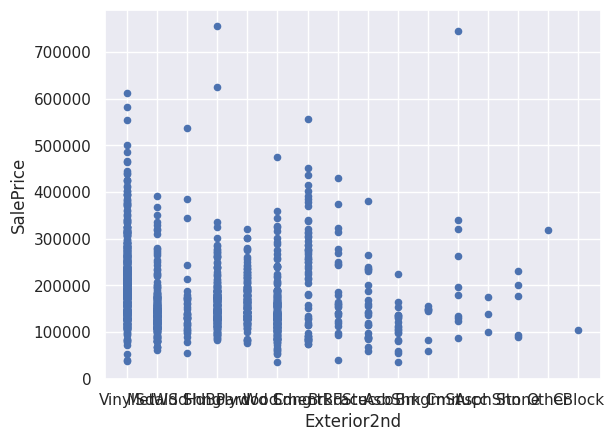

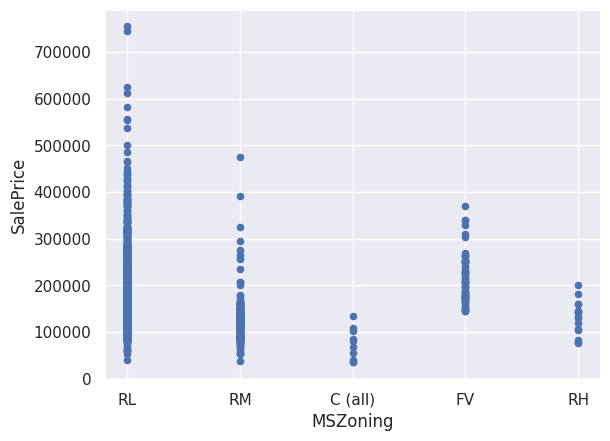

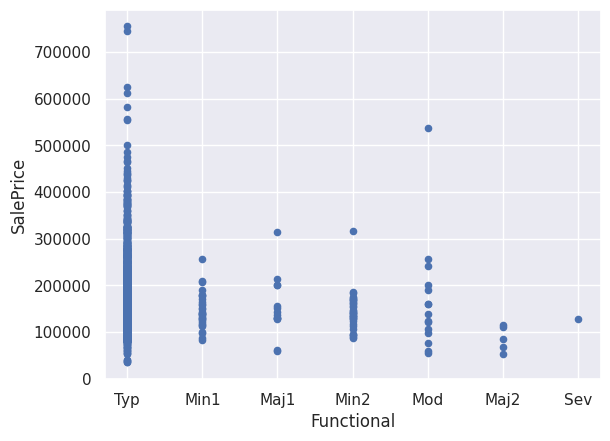

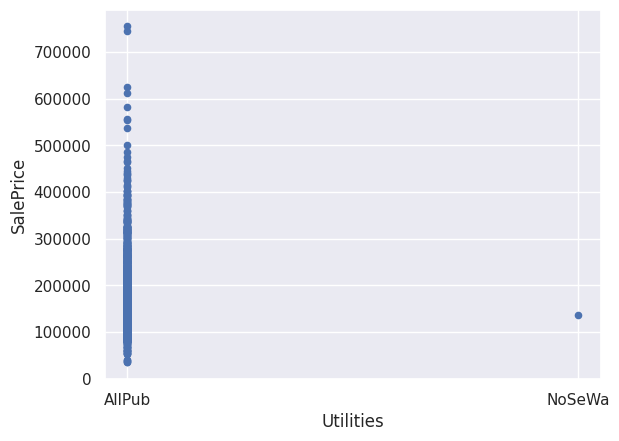

In [35]:
# show correlation between these categorical features and 'SalePrice'
cols = ['SaleType', 'Exterior1st', 'KitchenQual', 'Exterior2nd', 'MSZoning', 'Functional', 'Utilities']
for i in cols:
    var = i
    data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice')
    plt.show()

We note that there's no strong correlation

In [36]:
train_data = train_data.drop(cols, axis=1)
test_data = test_data.drop(cols, axis=1)

In [37]:
test_data.isnull().sum().max()   # Check that there's no missing data

0

In [38]:
test_data.shape

(1459, 54)

In [39]:
train_data.shape

(1458, 55)

# Data Preprocessing

**Histogram and normal probability plot**

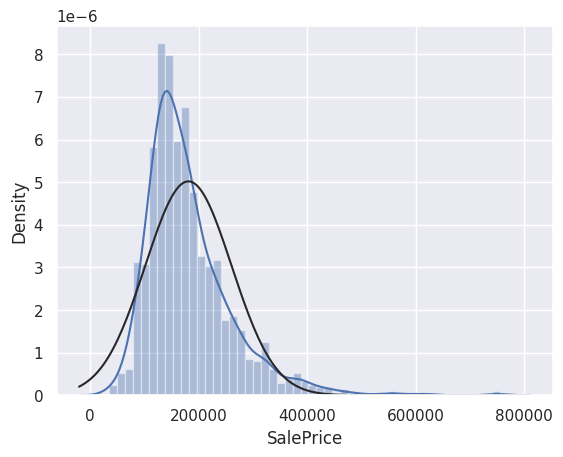

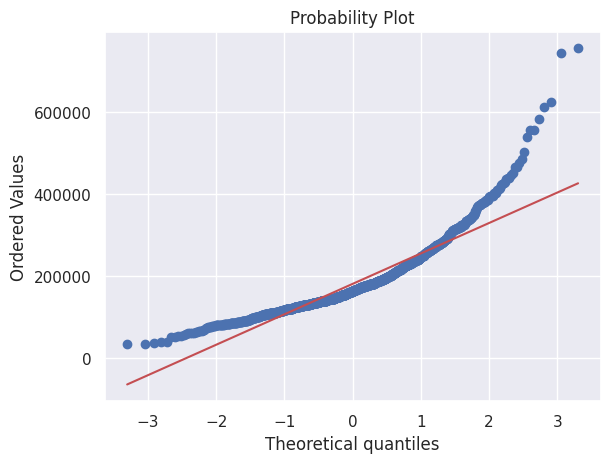

In [40]:
sns.distplot(train_data['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)

In [41]:
# Applying log transformation
train_data['SalePrice'] = np.log(train_data['SalePrice'])

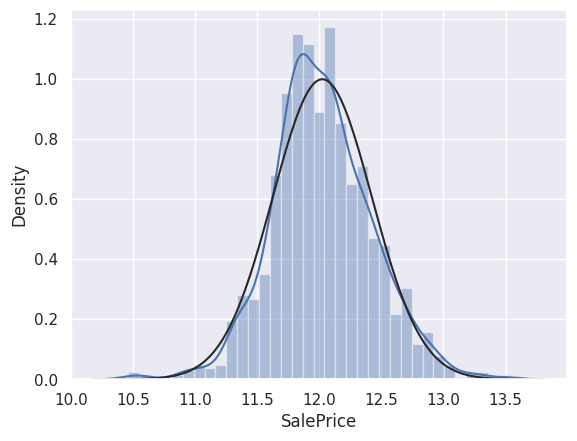

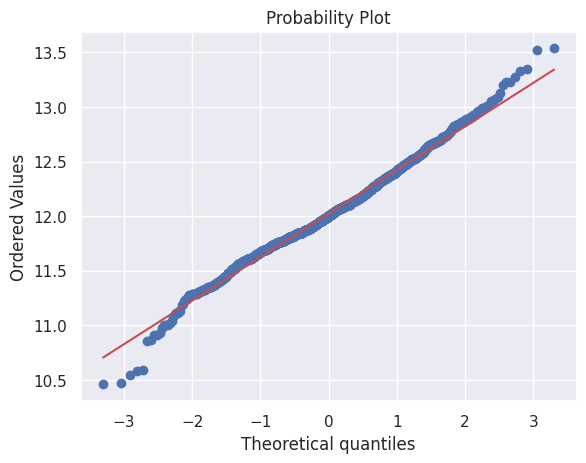

In [42]:
sns.distplot(train_data['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)

In [43]:
# Now drop 'Id' column which is unnecessary for trianing
train_data = train_data.drop(['Id'], axis=1)
test_ids = test_data['Id']
test_data = test_data.drop(['Id'], axis=1)

In [44]:
X = train_data.drop(['SalePrice'], axis=1)
y = train_data['SalePrice']

In [45]:
X.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,60,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,61,0,0,0,0,0,2,2008,Normal
1,20,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,298,0,0,0,0,0,0,5,2007,Normal
2,60,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,42,0,0,0,0,0,9,2008,Normal
3,70,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,0,35,272,0,0,0,0,2,2006,Abnorml
4,60,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,192,84,0,0,0,0,0,12,2008,Normal


In [46]:
test_data.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,...,140,0,0,0,120,0,0,6,2010,Normal
1,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,...,393,36,0,0,0,0,12500,6,2010,Normal
2,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,...,212,34,0,0,0,0,0,3,2010,Normal
3,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,...,360,36,0,0,0,0,0,6,2010,Normal
4,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,...,0,82,0,0,144,0,0,1,2010,Normal


In [47]:
# Convert categorical variables into numerical
label_enc = LabelEncoder()
for col in X.columns:
    if X[col].dtypes == "object":
        X[col] = label_enc.fit_transform(X[col])

In [48]:
X.shape

(1458, 53)

In [49]:
# Convert categorical variables into numerical
label_enc = LabelEncoder()
for col in test_data.columns:
    if test_data[col].dtypes == "object":
        test_data[col] = label_enc.fit_transform(test_data[col])

In [50]:
test_data.shape

(1459, 53)

# Build Model

In [51]:
# split train data into train set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1166, 53), (292, 53), (1166,), (292,))

**XGBoost (eXtreme Gradient Boosting)**
* open source implementation of boosted trees
* Fast efficient implementation
* Good choice of default splitting criteria and criteria for when to stop splitting
* Built in regularization to prevent overfitting
* Highly competitive algorithm for ML competitions

In [52]:
XGBReg = XGBRegressor(n_estimators=1000, learning_rate=0.05)
XGBReg.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

y_pred = XGBReg.predict(X_test)

print(XGBReg.score(X_train, y_train))
print(XGBReg.score(X_test, y_test))

0.9845131265931767
0.9024981755428826


In [53]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  0.08547539116732164
Mean Squared Error Value is :  0.01613525847981814
Median Squared Error Value is :  0.06168898558252245


In [54]:
XGBReg = XGBRegressor(n_estimators=1000, learning_rate=0.05)
XGBReg.fit(X, y)

print(XGBReg.score(X, y))

0.9998261647843245


**Calculating Predictions**

In [55]:
predictions = XGBReg.predict(test_data)

In [56]:
predictions[:10]

array([11.7151575, 11.951501 , 12.136701 , 12.119298 , 11.9546   ,
       12.064302 , 12.036588 , 11.975558 , 12.035439 , 11.67654  ],
      dtype=float32)

**Submission**

In [57]:
output = pd.DataFrame({'Id':test_ids, 'SalePrice':predictions})
output.to_csv('submission.csv', index=False)